In [67]:
glove_content=('''
king 0.50 0.70 -0.60 0.10
queen 0.55 0.75 -0.65 0.12
man 0.40 0.50 -0.30 0.05
woman 0.45 0.55 -0.35 0.07
apple 0.90 0.10 0.05 -0.20
mango 0.88 0.12 0.08 -0.18
computer -0.50 -0.40 0.80 0.90
keyboard -0.55 -0.42 0.85 0.92
''')

In [68]:
import numpy as np
import pandas as pd
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [69]:
glove2word2vec('test_glove.txt','test_wv.txt')

C:\Users\dai\AppData\Local\Temp\ipykernel_19184\2616311255.py:1: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec('test_glove.txt','test_wv.txt')


(8, 4)

In [70]:
model=KeyedVectors.load_word2vec_format('test_wv.txt', binary=False)
model

In [71]:
model.similarity('mango','apple')

np.float32(0.99897045)

In [72]:
model.similarity('king','queen')

np.float32(0.9998945)

In [73]:
model.similarity('computer','queen')

np.float32(-0.6342667)

Analogy: King - Man + woman

In [74]:
model.most_similar(positive=['woman','king'], negative=['man'],topn=1)

[('queen', 0.9998007416725159)]

In [75]:
model.most_similar('keyboard')[0]

('computer', 0.9996709227561951)

In [76]:
model.doesnt_match(['mango','computer','apple'])

'computer'

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)
vectors = pca.fit_transform(model.vectors)

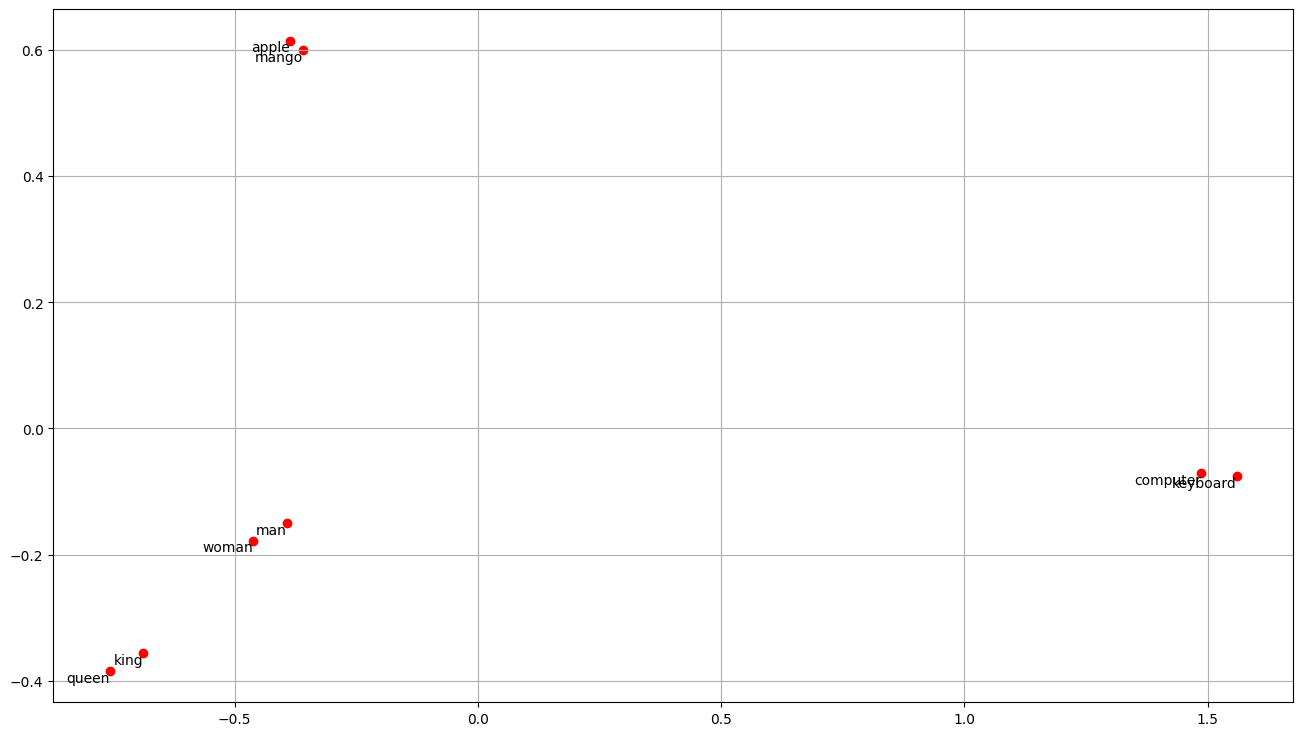

In [82]:
from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.scatter(vectors[:,0], vectors[:,1], c='red')
for i,word in enumerate(model.index_to_key):
    plt.annotate(word,xy=(vectors[i,0],vectors[i,1]),ha='right',va='top')
plt.grid()
plt.show()